# *Group 1*
## Loan Approal Prediction


### Problem Statement

>- Banks and financial institutions face the challenge of accurately assessing the risk of a borrower approval on a loan, which can result in a loss of revenue and damage to their reputation. 

>- Identifying potential fraud or misrepresentation by borrowers is also a significant concern for these institutions.

>- Therefore, there is a need to develop a loan  approval prediction model using Weka that can analyze a borrower's data and provide accurate predictions on the likelihood of being granted a loan.

* [Link to Dataset](https://drive.google.com/drive/folders/1V0oCSnpKhxIwV4i-o_Af6OxGUjiJn5KQ?usp=sharing)

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./data/LoanApprovalPrediction.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Feature Engineering and Visualization

In [5]:
# drop the Loan_ID column
data = data.drop('Loan_ID', axis=1)

In [6]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

From the summary above, we could observe that Dependents, LoanAmount, Loan_Amount_Term, and Credit_History have missing values

In [8]:
data["Dependents"] = data["Dependents"].fillna(data["Dependents"].mean())
data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].mean())
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean())
data["Credit_History"] = data["Credit_History"].fillna(data["Credit_History"].mean())

In [9]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no longer missing values in the dataset

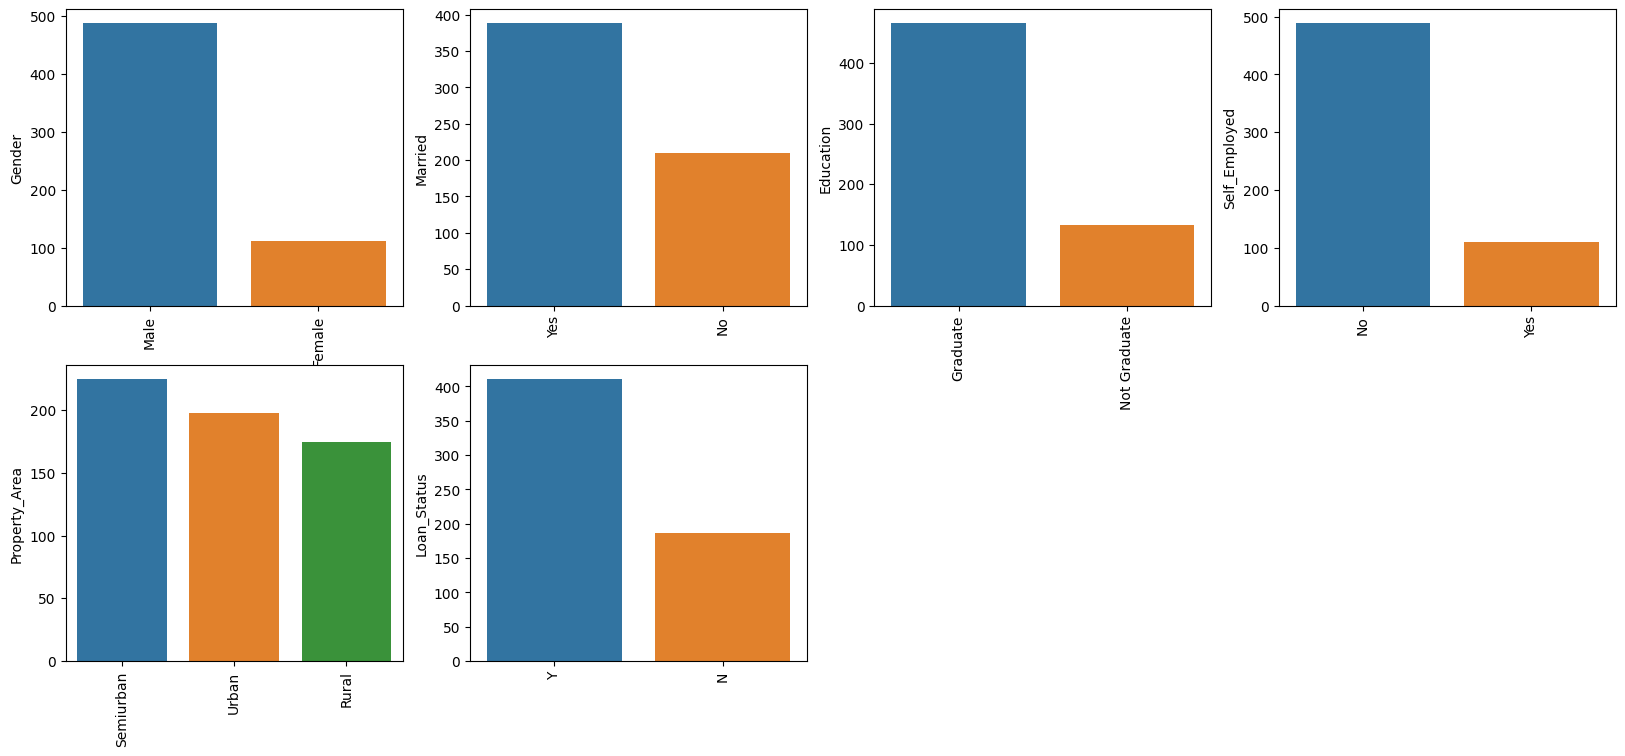

In [10]:
# Visualize the categorical data using barplot
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(20, 50))
index = 1

for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

From the chart above, we could observe that most of the features are binary, hence we would use *Label Encoder* to convert the categorical labels to numerical labels.

In [11]:
# Import label encoder
from sklearn import preprocessing
	
# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
    data[col] = label_encoder.fit_transform(data[col])

In [12]:
# Verify categorical data
# find the number of columns with datatye == "object"
obj = (data.dtypes == "object")
print("Categorical variables: ", len(obj[obj].index))

Categorical variables:  0


Performing Bivariate Data Analysis on Gender and Marital Status

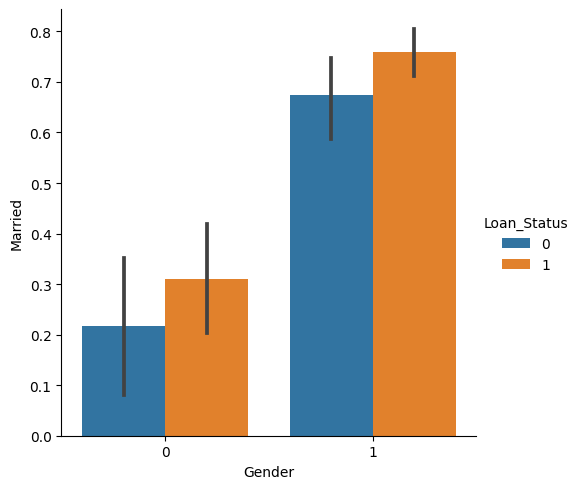

In [13]:
sns.catplot(x="Gender", y="Married", hue="Loan_Status", kind="bar", data=data);

From the chart above, more males request for loans than female. And also, males have more loan approval than females.

### Building the Model

Split the dataset into train and test

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop(["Loan_Status"], axis=1)
y = data["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

### Model Training and Evaluation

**As this is a classification problem, we shall use the following models:**

* KNeighborsClassifiers
* Support Vector Classifiers (SVC)
* Logistics Regression
* RandomForestClassifiers

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
svc = SVC()
lc = LogisticRegression()

### Using K-Fold Cross Validation

In [17]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3) # n_splits specifies the # of k folds

#### Demonstrating K-Fold 

In [18]:
for train, val in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train, val)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


### Cross Validation Function

In [19]:
from sklearn.model_selection import cross_val_score

#### KNeighborsClassifier model performance using cross_val_score

In [20]:
cross_val_score(KNeighborsClassifier(n_neighbors=3), X, y, cv=3) * 100

array([65.5       , 59.79899497, 57.28643216])

In [21]:
cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=3) * 100

array([79.        , 79.39698492, 81.90954774])

In [22]:
cross_val_score(SVC(), X, y, cv=3) * 100

array([68.5       , 68.34170854, 67.33668342])

In [23]:
cross_val_score(RandomForestClassifier(), X, y, cv=3) * 100

array([79.5       , 79.39698492, 76.88442211])

### Hyperparameter Tunning using K Fold Cross Validation

In [24]:
scores1 = cross_val_score(LogisticRegression(solver='liblinear', multi_class='ovr'), X, y, cv=10)
np.average(scores1) * 100

80.6045197740113

In [25]:
scores1 = cross_val_score(LogisticRegression(solver='newton-cholesky', multi_class='ovr'), X, y, cv=10)
np.average(scores1) * 100

80.77401129943503

In [26]:
scores1 = cross_val_score(LogisticRegression(solver='liblinear', multi_class='auto'), X, y, cv=5)
np.average(scores1) * 100

80.27591036414566

In [27]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40), X, y, cv=10)
np.average(scores4) * 100

80.27118644067797